In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import linear_model, datasets
from sklearn.linear_model import Lasso
%matplotlib inline

In [2]:
#removing values where gene-id is 0 (unidentified)
data = pd.read_csv('ExpressionR50.csv', header =None)
rows = pd.read_csv('RowsR50.csv')
age = np.array([12, 13, 13, 12, 16, 17, 21, 21, 24, 35, 37])
gene_id = rows.ix[:,2]
data_id = pd.concat([data, gene_id], axis=1)
new_data = data_id[data_id['gene-id']!= 0]
clean_data = new_data.ix[:,:-1]

In [3]:
just_data = new_data.ix[:,:11].values

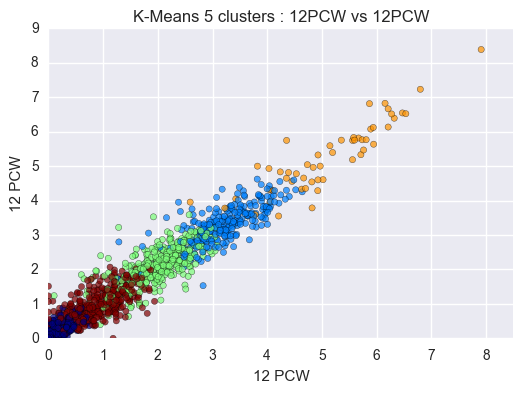

In [38]:
km = KMeans(n_clusters = 5)
km.fit(just_data)

group = km.labels_

plt.scatter(just_data[:,0],just_data[:,3],
            alpha=0.7, c=group, cmap='jet')

plt.xlim([0,8.5])
plt.ylim([0,9])
plt.title('K-Means 5 clusters : 12PCW vs 12PCW')
plt.xlabel("12 PCW")
plt.ylabel("12 PCW")

In [5]:
pd.DataFrame(just_data[:,:]).head()
Predict = pd.DataFrame(group)

In [6]:
Data_Predict = np.column_stack((new_data.iloc[:,11:13], Predict))
GeneID_Predict = pd.DataFrame(Data_Predict[:,:])
GeneID_Predict.head()

,0,1
0,30786,3
1,865,1
2,34129,3
3,81016,3
4,34829,3


In [7]:
cluster0 = GeneID_Predict[GeneID_Predict[1]== 0]
cluster1 = GeneID_Predict[GeneID_Predict[1]== 1]
cluster2 = GeneID_Predict[GeneID_Predict[1]== 2]
cluster3 = GeneID_Predict[GeneID_Predict[1]== 3]
cluster4 = GeneID_Predict[GeneID_Predict[1]== 4]

In [8]:
Cluster0_genes = cluster0.iloc[:,0:1].values
Cluster1_genes = cluster1.iloc[:,0:1].values
Cluster2_genes = cluster2.iloc[:,0:1].values
Cluster3_genes = cluster3.iloc[:,0:1].values
Cluster4_genes = cluster4.iloc[:,0:1].values

In [9]:
Cluster0_genes.size

388

In [10]:
Cluster1_genes.size

53

In [11]:
Cluster2_genes.size

266

In [12]:
Cluster3_genes.size

374

In [13]:
Cluster4_genes.size

516

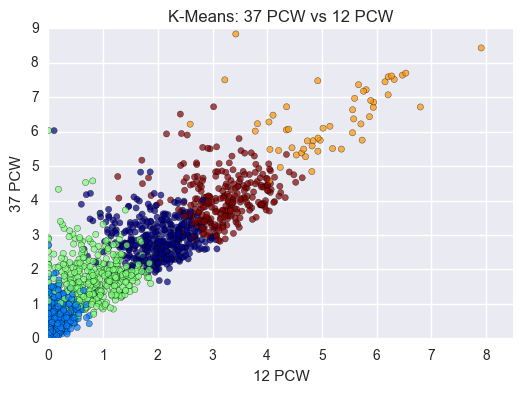

In [14]:
km = KMeans(n_clusters = 5)
km.fit(just_data)

group = km.labels_

plt.scatter(just_data[:,0],just_data[:,-1],
            alpha=0.7, c=group, cmap='jet')
plt.xlim([0,8.5])
plt.ylim([0,9])
plt.xlabel("12 PCW")
plt.ylabel("37 PCW")
plt.title("K-Means: 37 PCW vs 12 PCW")

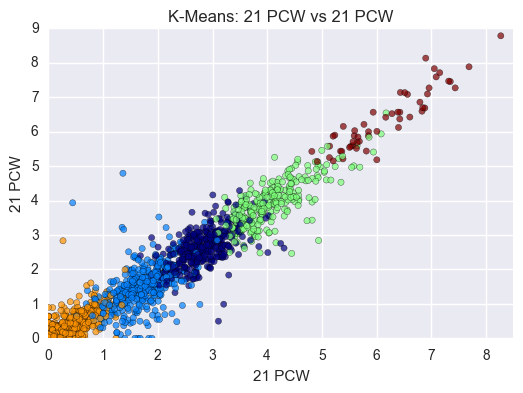

In [15]:
km = KMeans(n_clusters = 5)
km.fit(just_data)

group = km.labels_

plt.scatter(just_data[:,7],just_data[:,8],
            alpha=0.7, c=group, cmap='jet')

plt.xlim([0,8.5])
plt.ylim([0,9])
plt.xlabel("21 PCW")
plt.ylabel("21 PCW")
plt.title("K-Means: 21 PCW vs 21 PCW")

In [16]:
just_data.shape

(1597, 11)

In [17]:
just_dataT = just_data.T

In [18]:
just_dataT.shape

(11, 1597)

Lasso Regression: [ 0.38233716]
Lasso Intercept: [ 5.86582343]


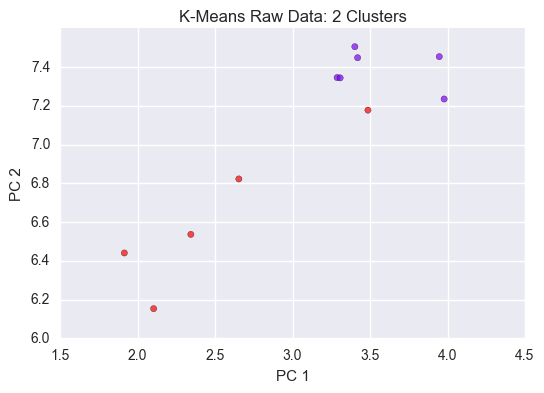

In [49]:
km = KMeans(n_clusters = 2)
km.fit(just_dataT)

group = km.labels_

plt.scatter(just_dataT[:,0],just_dataT[:,1],
            alpha=0.7, c=group, cmap='rainbow')

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("K-Means Raw Data: 2 Clusters")

clf = linear_model.Lasso(alpha=0.1)
clf.fit(just_dataT[:,0].reshape(-1,1),just_dataT[:,1].reshape(-1,1))

print('Lasso Regression:', clf.coef_)
print('Lasso Intercept:', clf.intercept_)

Lasso Regression: [ 5.89349938]
Lasso Intercept: 1.95832598343


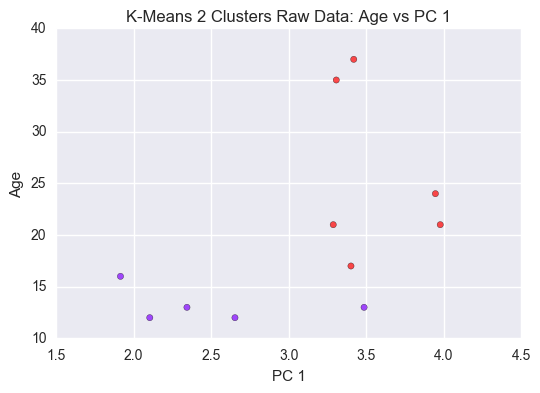

In [48]:
km = KMeans(n_clusters = 2)
km.fit(just_dataT)

group = km.labels_

plt.scatter(just_dataT[:,0],age,
            alpha=0.7, c=group, cmap='rainbow')

plt.xlabel("PC 1")
plt.ylabel("Age")
plt.title("K-Means 2 Clusters Raw Data: Age vs PC 1")

clf = linear_model.Lasso(alpha=0.1)
clf.fit(just_dataT[:,0].reshape(-1,1), age)

print('Lasso Regression:', clf.coef_)
print('Lasso Intercept:', clf.intercept_)

In [43]:
just_dataT[:,0]

array([ 2.1039,  3.4865,  2.3438,  2.6535,  1.9149,  3.4019,  3.978 ,
        3.2876,  3.9467,  3.3072,  3.4198])